In [1]:
import os

In [2]:
os.chdir('C:/Users/ASUS/Desktop/Data Science/Capstone Project 2')

In [3]:
# importing libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

#importing data
data=pd.read_csv('customer_churn_data.csv')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print('Shape of dataset is {} rows and {} columns'.format(data.shape[0],data.shape[1]))

Shape of dataset is 7043 rows and 21 columns


In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Data Overview is showing that multiple variables are set to be have been available defining about the services customers are taking and also about customers who churned from the service.

Data has no null values and hence we need not to worry about cleaning the data and we can straight away move towards EDA to understand the data better.

# Exploratory Data Analysis

In [8]:
# descriptive statistics.
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [9]:
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

There are some missing values in TotalCharges. 

In [10]:
print('Number of missing values in Total Charges are:{}'.format(data[data['TotalCharges']==' ']['TotalCharges'].value_counts()))

Number of missing values in Total Charges are:     11
Name: TotalCharges, dtype: int64


### We will drop these missing values.

In [11]:
data["TotalCharges"].replace(" ",np.nan,inplace=True)

In [12]:
#Dropping null values from total charges column which contain .15% missing data 
data = data[data["TotalCharges"].notnull()]
data = data.reset_index()[data.columns]

In [13]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
#convert to float type
data["TotalCharges"] = data["TotalCharges"].astype(float)

In [15]:
data.tenure.describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [16]:
data['tenure_bin']=pd.qcut(data['tenure'], q=4)

In [17]:
#Separating catagorical and numerical columns
cat_cols   = data.nunique()[data.nunique() < 6].keys().to_list()

In [18]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'tenure_bin']

In [19]:
target_col=['Churn']
Id_col     = ['customerID']
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in data.columns if x not in cat_cols + target_col + Id_col]

In [20]:
#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    data[i]  = data[i].replace({'No internet service' : 'No'})
    
#replace values
data["SeniorCitizen"] = data["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [21]:
churn_value=data.Churn.value_counts()
print('Percentage of retained customers:{}%'.format((churn_value[0]/len(data['Churn'])*100)))
print('Percentage of churned customers:{}%'.format((churn_value[1]/len(data['Churn'])*100)))

Percentage of retained customers:73.42150170648463%
Percentage of churned customers:26.578498293515356%


In [22]:
import matplotlib.pyplot as plt
pielabel=['Retained','Churned']
share=[(churn_value[0]/len(data['Churn'])),(churn_value[1]/len(data['Churn']))]
fig,ax=plt.subplots(figsize=(12,6))
ax.pie(share,labels=pielabel,autopct='%1.2f',startangle=90)
ax.axis('equal')
plt.show()

<Figure size 1200x600 with 1 Axes>

#### Understanding numerical features and there impact on churning of customers
Numerical features are 3: Tenure, MonthlyCharges, Total Charges

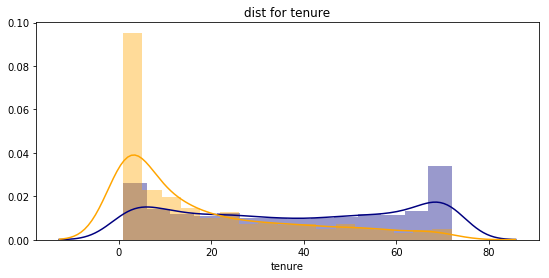

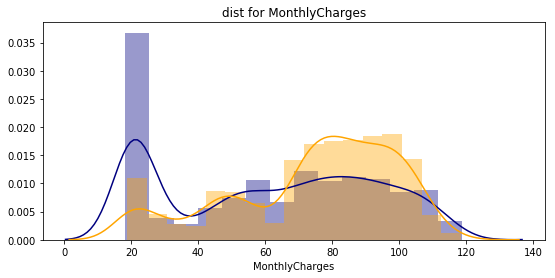

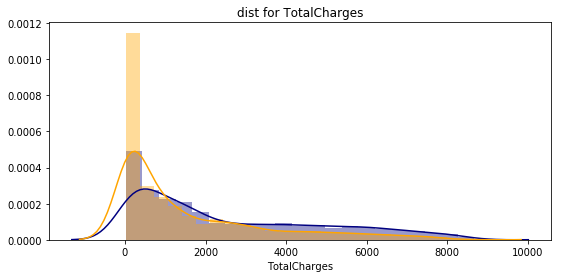

In [23]:
import seaborn as sns
def distplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("dist for {}".format(feature))
    ax0 = sns.distplot(data[data['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No',kde=True)
    ax1 = sns.distplot(data[data['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
distplot('tenure')
distplot('MonthlyCharges')
distplot('TotalCharges')

From the plots above we can conclude that:

* Recent clients are more likely to churn
* Clients with higher MonthlyCharges are also more likely to churn
* Tenure and MonthlyCharges are probably important features

#### Understanding 16 categorical features and their impact on customer churn

##### Gender and Age

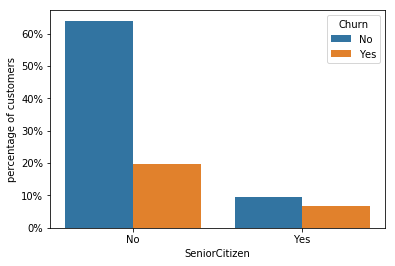

In [24]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = data.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(data)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

In [25]:
data['Churn']=data['Churn'].replace(['Yes','No'],[1,0])

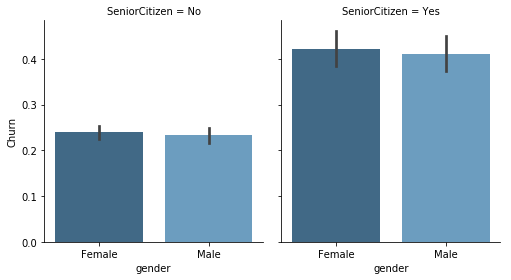

In [26]:
g = sns.FacetGrid(data, col="SeniorCitizen", height=4, aspect=.9)
ax = g.map(sns.barplot, "gender", "Churn", palette = "Blues_d", order= ['Female', 'Male'])

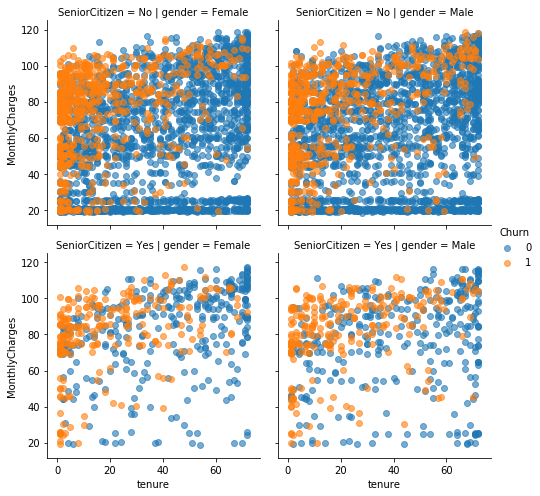

In [27]:
g = sns.FacetGrid(data, row='SeniorCitizen', col="gender", hue="Churn", height=3.5)
g.map(plt.scatter, "tenure", "MonthlyCharges", alpha=0.6)
g.add_legend();

Observations from gender and age:
 * Non-Senior citizens are mostly retained customers, while there is a difficulty in retaining senior citizens.
 * Gender is a non indicative factor.
 * Non- senior citizens are using services for less tenure and higher tenancy to chun at earlier stages of using the services. While non-senior citizens has higher churn rate after using services for less than 10 year, but maximum of non-senior citizens are using services for longer duration.

#### Partners and Dependents

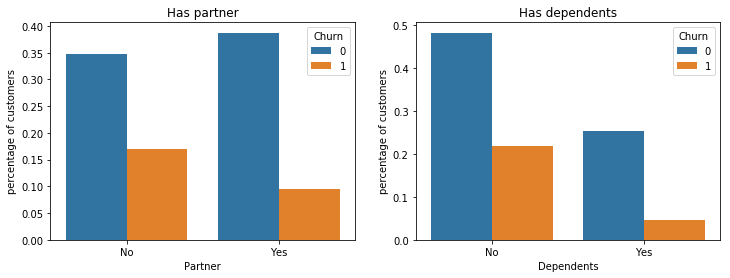

In [28]:
fig, axis = plt.subplots(1, 2, figsize=(12,4))
axis[0].set_title("Has partner")
axis[1].set_title("Has dependents")
axis_y = "percentage of customers"
# Plot Partner column
gp_partner = data.groupby('Partner')["Churn"].value_counts()/len(data)
gp_partner = gp_partner.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Partner', y= axis_y, hue='Churn', data=gp_partner, ax=axis[0])
# Plot Dependents column
gp_dep = data.groupby('Dependents')["Churn"].value_counts()/len(data)
gp_dep = gp_dep.to_frame().rename({"Churn": axis_y}, axis=1).reset_index()
ax = sns.barplot(x='Dependents', y= axis_y, hue='Churn', data=gp_dep, ax=axis[1])

* customers without partners are more likely to churn
* customers without dependents are more likely to churn

##### Services

###### Phone and Internet

Features connected to phone are two: If customer has phone service or not and secondly if he has multiple lines or not

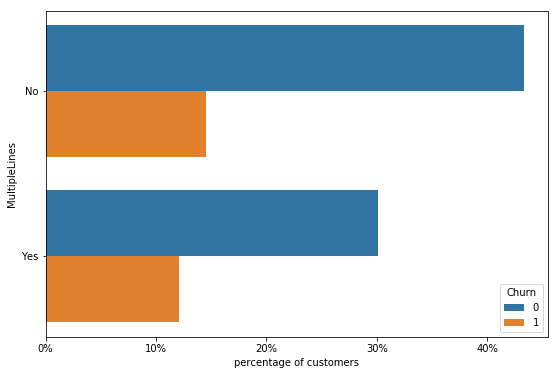

In [29]:
data['MultipleLines']=data['MultipleLines'].replace('No phone service','No')
plt.figure(figsize=(9, 6))
barplot_percentages("MultipleLines", orient='h')

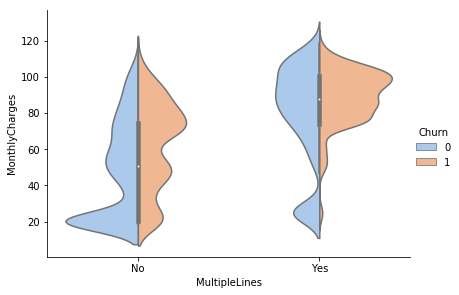

In [30]:
x = sns.catplot(x="MultipleLines", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=data, height=4.2, aspect=1.4)

* Customers with multiple lines are likely to churn.
* Customers with multiple lines with higher charges are more likely to churn, while customers with no multiple lines are equally
distributed montly charges

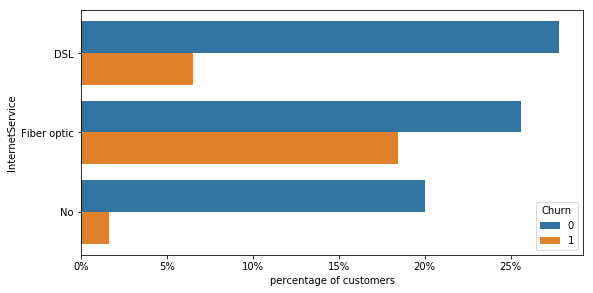

In [31]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("InternetService", orient="h")

* Customer using Fiber Optic for internet service are more likely to churn

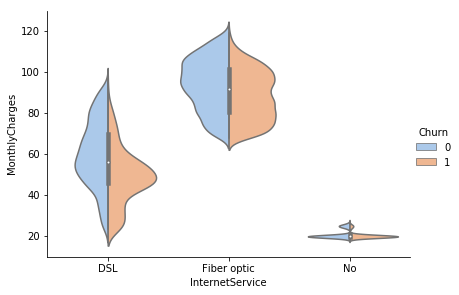

In [32]:
ax = sns.catplot(x="InternetService", y="MonthlyCharges", hue="Churn", kind="violin",
                 split=True, palette="pastel", data=data, height=4.2, aspect=1.4);

* Customers with DSL has low monthly charges and less likely to churn than with customers using fiber optic.

###### Additional Services
There are six additional services which a customer gets with internet usage. 
These services are value added services and tries to improve customer experience
Let's see how these services impact on retaining customers.

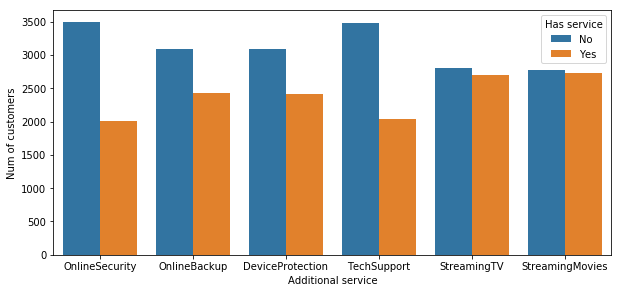

In [33]:
cols = ["OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]
df1 = pd.melt(data[data["InternetService"] != "No"][cols]).rename({'value': 'Has service'}, axis=1)
plt.figure(figsize=(10, 4.5))
ax = sns.countplot(data=df1, x='variable', hue='Has service')
ax.set(xlabel='Additional service', ylabel='Num of customers')
plt.show()

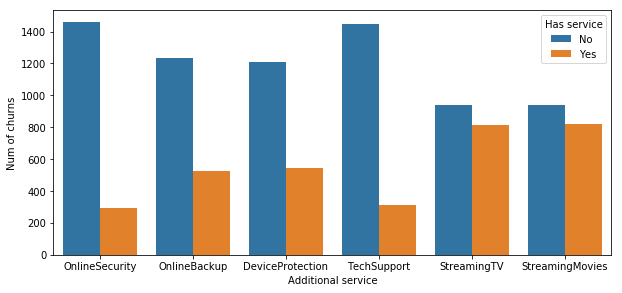

In [34]:
plt.figure(figsize=(10, 4.5))
df1 = data[(data.InternetService != "No") & (data.Churn == 1)]
df1 = pd.melt(df1[cols]).rename({'value': 'Has service'}, axis=1)
ax = sns.countplot(data=df1, x='variable', hue='Has service', hue_order=['No', 'Yes'])
ax.set(xlabel='Additional service', ylabel='Num of churns')
plt.show()

Observation: Customers using additional services are less likely to churn

#### Contract and Payment

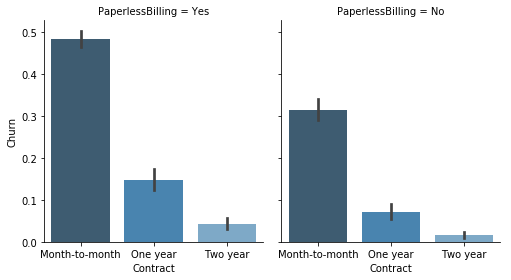

In [35]:
g = sns.FacetGrid(data, col="PaperlessBilling", height=4, aspect=.9)
ax = g.map(sns.barplot, "Contract", "Churn", palette = "Blues_d", order= ['Month-to-month', 'One year', 'Two year'])

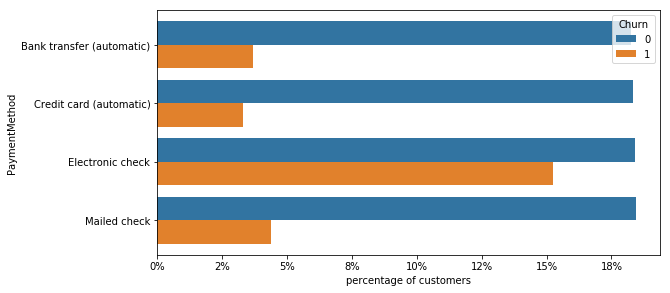

In [36]:
plt.figure(figsize=(9, 4.5))
barplot_percentages("PaymentMethod", orient='h')

A few observations:

Customers with paperless billing are more probable to churn
The preferred payment method is Electronic check with around 35% of customers. This method also has a very high churn rate
Short term contracts have higher churn rates
One and two year contracts probably have contractual fines and therefore customers have to wait untill the end of contract to churn. A time-series dataset would be better to understand this kind of behaviour. Now let's have a look at the relation with numerical features:

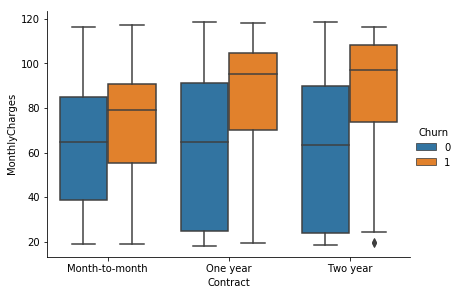

In [37]:
ax = sns.catplot(x="Contract", y="MonthlyCharges", hue="Churn", kind="box", data=data, height=4.2, aspect=1.4)

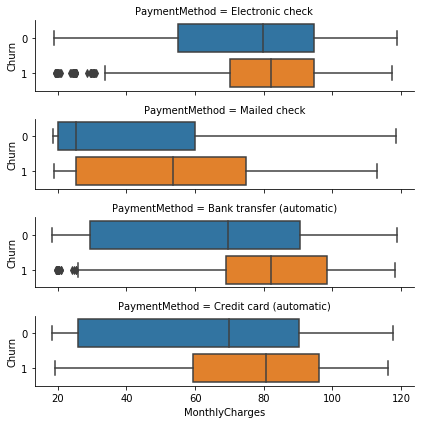

In [38]:
ax = sns.catplot(y="Churn", x="MonthlyCharges", row="PaymentMethod", kind="box", data=data, height=1.5, aspect=4, orient='h')

## Correlation

In [41]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'tenure_bin'],
      dtype='object')

In [42]:
data1=data['customerID']
data.drop('customerID',axis=1,inplace=True)
data_dummies=pd.get_dummies(data)
data_dummies.head()

,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,...,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,"tenure_bin_(0.999, 9.0]","tenure_bin_(9.0, 29.0]","tenure_bin_(29.0, 55.0]","tenure_bin_(55.0, 72.0]"
0,1,29.85,29.85,0,1,0,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
1,34,56.95,1889.50,0,0,1,1,0,1,0,...,1,0,0,0,0,1,0,0,1,0
2,2,53.85,108.15,1,0,1,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
3,45,42.30,1840.75,0,0,1,1,0,1,0,...,1,0,1,0,0,0,0,0,1,0
4,2,70.70,151.65,1,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,0,0


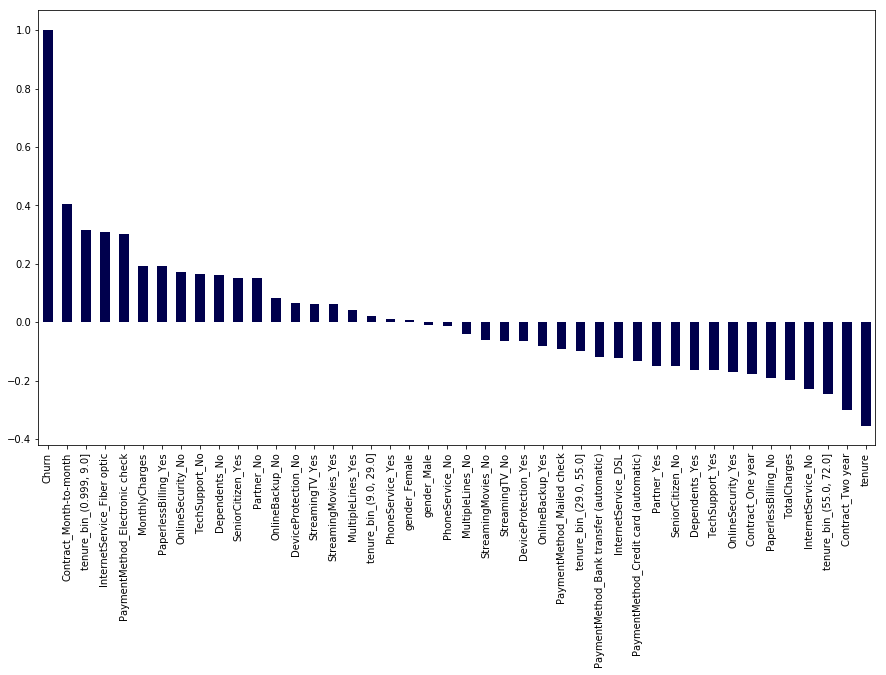

In [46]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(15,8))
data_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar',colormap='seismic')

Observation:
* Month to month contracts, absence of online security and tech support seem to be positively correlated with churn. While, tenure, two year contracts seem to be negatively correlated with churn.

* Interestingly, services such as Online security, streaming TV, online backup, tech support, etc. without internet connection seem to be negatively related to churn.

* We will explore the patterns for the above correlations below before we delve into modelling and identifying the important variables.

## Building predictive model based on above analysis

In [47]:
y = data_dummies['Churn'].values
X = data_dummies.drop(columns = ['Churn'])

# Scaling all the variables to a range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

In [48]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [49]:
# Running logistic regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
result = model.fit(X_train, y_train)

In [51]:
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.8061611374407583


AxesSubplot(0.125,0.125;0.775x0.755)


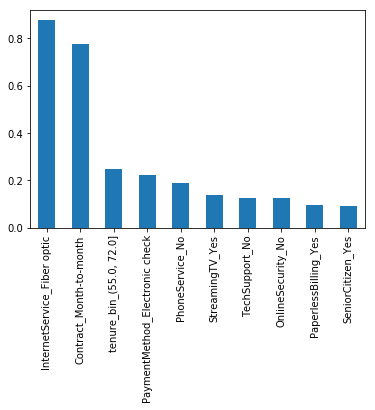

In [50]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0],
                 index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

We have predicted the model with Logistic Regression with 80% accuracy.
* Laying down the weights of variables on which this model has been designed tells us that, churning or retaining of customers majorly depends because of Internet Service and payment contract.

AxesSubplot(0.125,0.125;0.775x0.755)


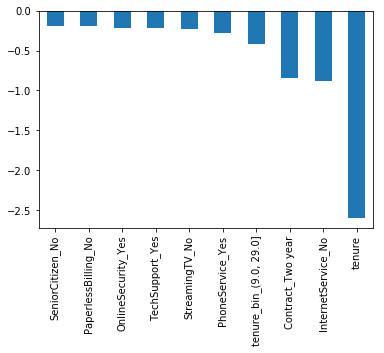

In [52]:
print(weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

We can see that some variables have a negative relation to our predicted variable (Churn), while some have positive relation. Negative relation means that likeliness of churn decreases with that variable. Let us summarize some of the interesting features below:

* As we saw in our EDA, having a 2 month contract reduces chances of churn. 2 month contract along with tenure have the most negative relation with Churn as predicted by logistic regressions
* Having DSL internet service also reduces the proability of Churn
* Lastly, total charges, monthly contracts, fibre optic internet services and seniority can lead to higher churn rates. This is interesting because although fibre optic services are faster, customers are likely to churn because of it. I think we need to explore more to better understad why this is happening.


### Model 2 : SVM